In [2]:
import numpy as np
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
    })
from time import time

## Advertising example
Taken from VMLS book, 12.4

In [8]:
m, n = 10, 3
A = np.array([
    [0.97, 1.86, 0.41],
    [1.23, 2.18, 0.53],
    [0.80, 1.24, 0.62],
    [1.29, 0.98, 0.51],
    [1.10, 1.23, 0.69],
    [0.67, 0.34, 0.54],
    [0.87, 0.26, 0.62],
    [1.10, 0.16, 0.48],
    [1.92, 0.22, 0.71],
    [1.29, 0.12, 0.62]
    ])
v_des = 1000*np.ones(10)

In [9]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

In [10]:
t_start = time()
M = A.T.dot(A)
q = A.T.dot(v_des)
L = llt(M)
x = forward_substitution(L, q)
x = backward_substitution(L.T, x)
print("LL' elapsed time: %.5f sec" % (time() - t_start))

LL' elapsed time: 0.00042 sec


In [11]:
x

array([  62.07662454,   99.98500403, 1442.83746254])

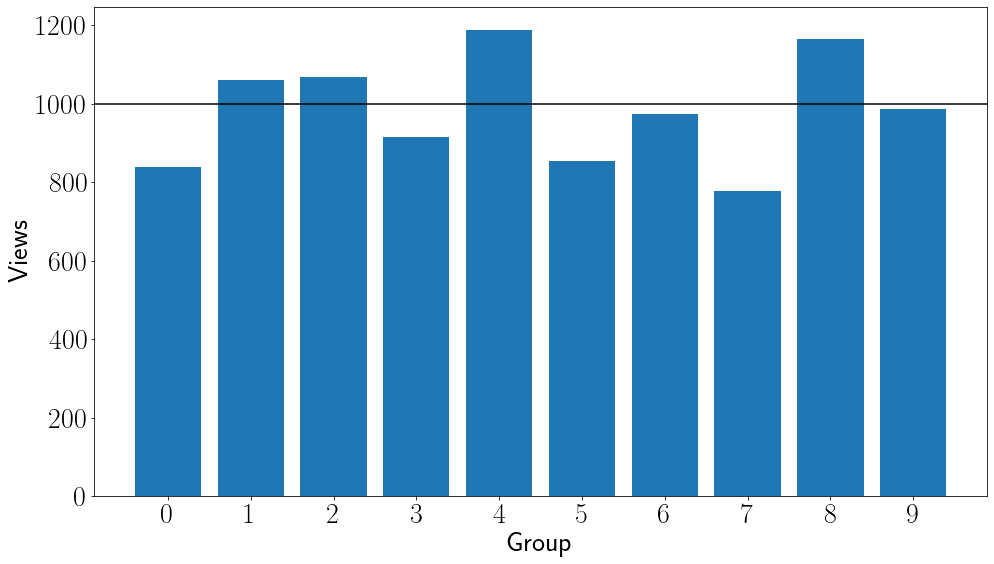

In [12]:
fig = plt.figure(figsize=(16, 9))
plt.bar(np.arange(m), A.dot(x))
plt.axhline(y=1000, color='k', linestyle='-')
plt.xticks(np.arange(m))
plt.xlabel("Group")
plt.ylabel("Views")
plt.savefig('advertising.pdf')